# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | aitape
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | seogwipo
City not found. Skipping...
Processing Record 6 of Set 1 | sao miguel do araguaia
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | fale old settlement
Processing Record 10 of Set 1 | dompu
Processing Record 11 of Set 1 | borogontsy
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | tazovsky
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | paris
Processing Record 18 of Set 1 | prado
Processing Record 19 of Set 1 | beloyarskiy
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | khorramabad
Processing Record 22 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,296.37,87,37,2.79,ZA,1707011981
1,aitape,-3.1374,142.3475,302.09,73,95,2.31,PG,1707011981
2,margaret river,-33.9500,115.0667,290.94,52,75,6.58,AU,1707011981
3,thompson,55.7435,-97.8558,273.24,100,100,2.06,CA,1707011981
4,sao miguel do araguaia,-13.2750,-50.1628,296.30,87,100,0.84,BR,1707011982


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,296.37,87,37,2.79,ZA,1707011981
1,aitape,-3.1374,142.3475,302.09,73,95,2.31,PG,1707011981
2,margaret river,-33.9500,115.0667,290.94,52,75,6.58,AU,1707011981
3,thompson,55.7435,-97.8558,273.24,100,100,2.06,CA,1707011981
4,sao miguel do araguaia,-13.2750,-50.1628,296.30,87,100,0.84,BR,1707011982


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

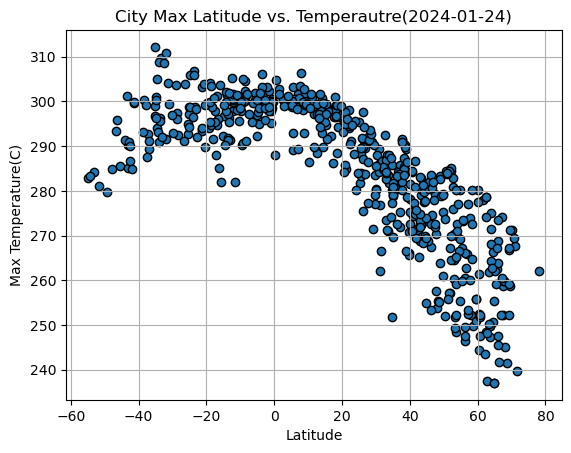

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
            edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Temperautre(2024-01-24)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

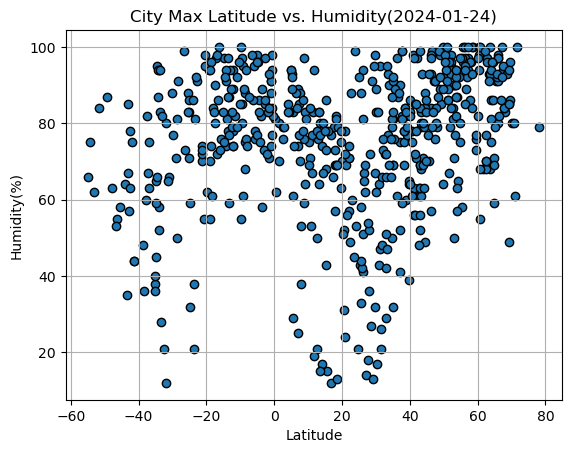

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],
            edgecolor="black")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Humidity(2024-01-24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

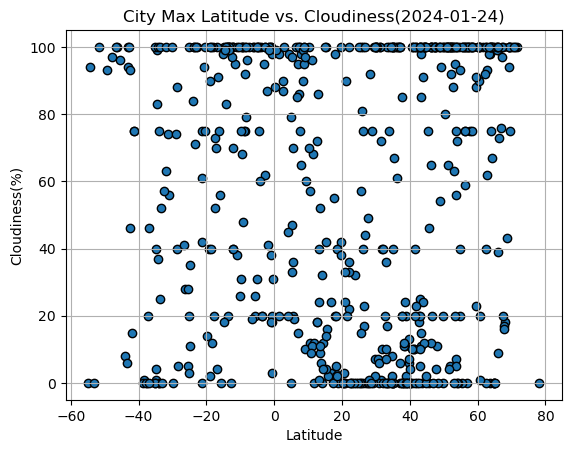

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],
            edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Cloudiness(2024-01-24)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

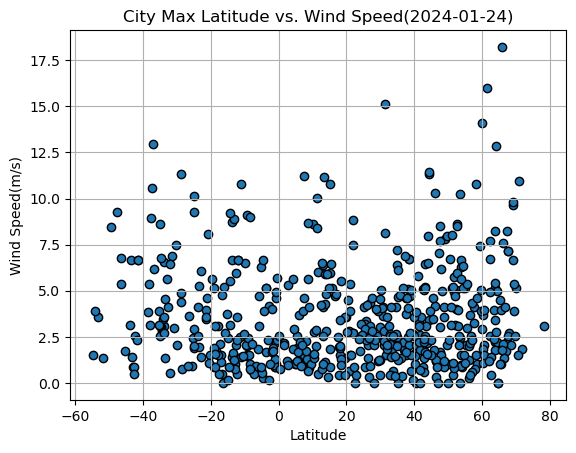

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],
            edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Wind Speed(2024-01-24)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress_plot(x_values, y_values, xlabel, ylabel, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=coordinates, xytext=(0.5, 0.5), textcoords='axes fraction', fontsize=15, color="red")
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,thompson,55.7435,-97.8558,273.24,100,100,2.06,CA,1707011981
9,borogontsy,62.6683,131.1683,237.48,97,62,0.45,RU,1707011983
10,tiksi,71.6872,128.8694,239.64,100,100,1.83,RU,1707011983
11,tazovsky,67.4667,78.7000,258.71,94,100,2.20,RU,1707011983
12,iqaluit,63.7506,-68.5145,247.42,68,0,5.14,CA,1707011983


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,296.37,87,37,2.79,ZA,1707011981
1,aitape,-3.1374,142.3475,302.09,73,95,2.31,PG,1707011981
2,margaret river,-33.9500,115.0667,290.94,52,75,6.58,AU,1707011981
4,sao miguel do araguaia,-13.2750,-50.1628,296.30,87,100,0.84,BR,1707011982
5,puerto ayora,-0.7393,-90.3518,298.46,98,18,2.24,EC,1707011982


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7179163882974777


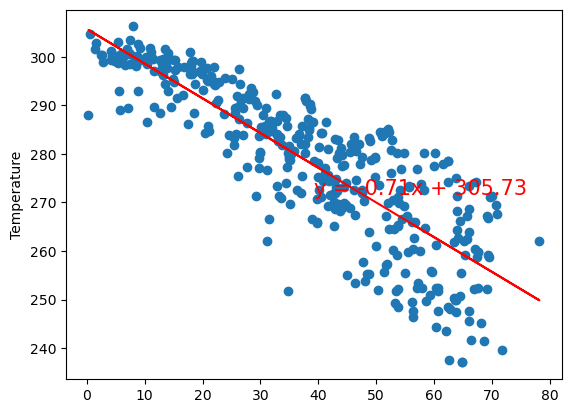

In [60]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regress_plot(x_values, y_values, "Latitude", "Temperature", (10,250))

The r-squared is: 0.13903986385727377


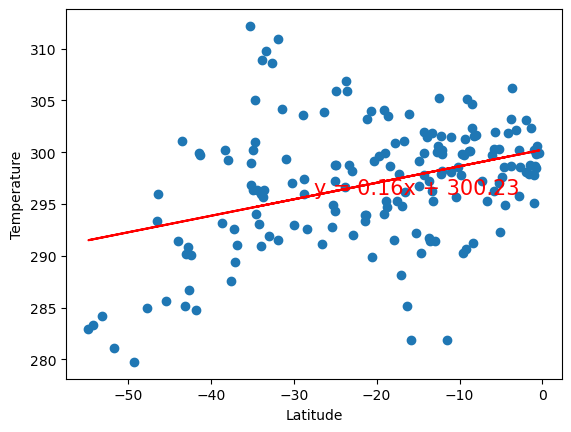

In [67]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regress_plot(x_values, y_values, "Latitude", "Temperature", (-30,280))

**Discussion about the linear relationship:** The value of r-squared is 0.7 for Nothern Hemisphere which indicates strong negative correlation between Temperature and Latitude which means as Latitude increase, max temperature goes down.
For Southern hemispere, r-squared value is near to 0.14 which does not show a correlation between tempearture and Latitude but there will be positive relation which means as latitude increases temperature also increases

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.13656327552707526


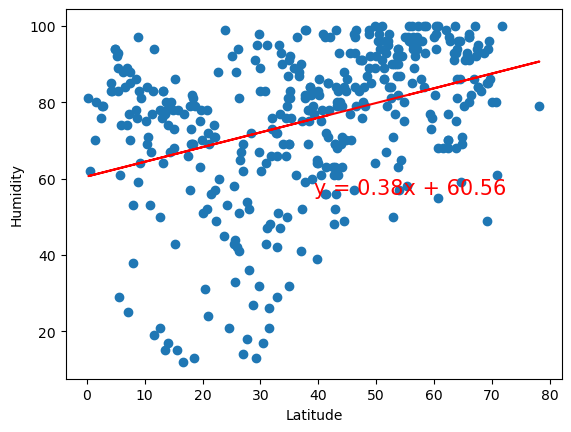

In [69]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regress_plot(x_values, y_values, "Latitude", "Humidity", (10,40))

The r-squared is: 0.20983356078502088


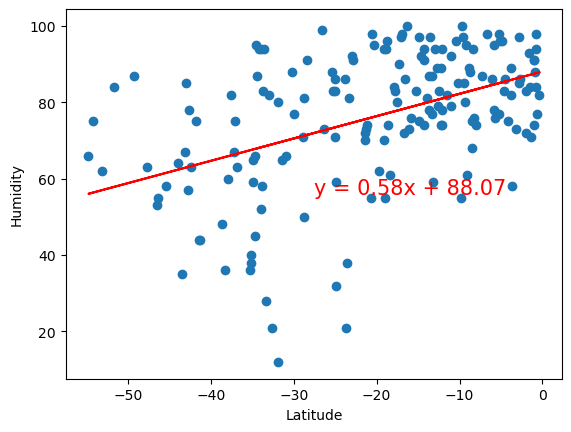

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regress_plot(x_values, y_values, "Latitude", "Humidity", (-30,50))

**Discussion about the linear relationship:** Since the slope is positive it indicates a positive realtionship between Latitude and Humidity(for Northern and Southern Hemisphere) but since the value of r squared is low there is almost no correlation between the 2.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04970606572872588


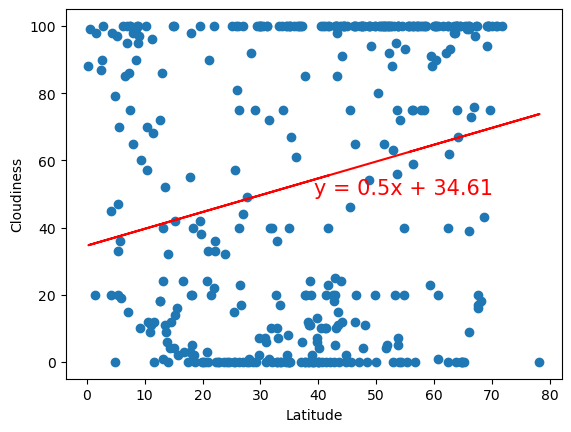

In [72]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regress_plot(x_values, y_values, "Latitude", "Cloudiness", (5,30))

The r-squared is: 0.04120102749843087


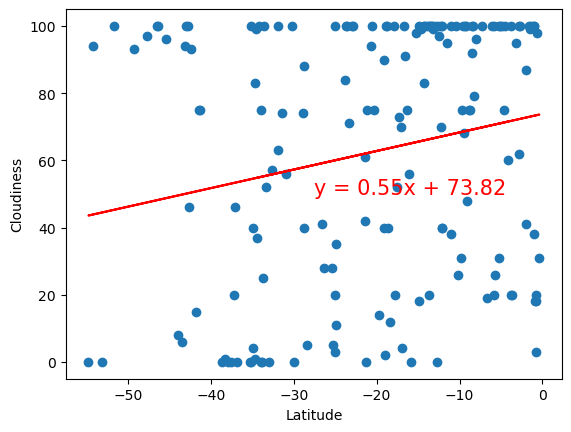

In [73]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regress_plot(x_values, y_values, "Latitude", "Cloudiness", (-30,30))

**Discussion about the linear relationship:**  There is a positive relationship between Latitude and cloudiness(Northern and Southern Hemisphere) but that is very little. Also the value of rsquared is very low, this also indicates no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.020951166108233065


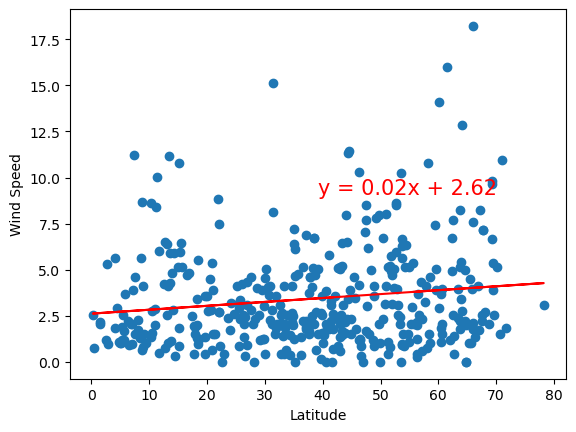

In [75]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regress_plot(x_values, y_values, "Latitude", "Wind Speed", (5,10))

The r-squared is: 0.05886432459725909


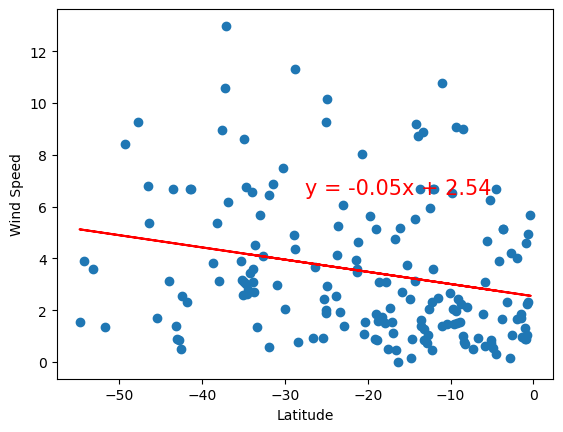

In [77]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regress_plot(x_values, y_values, "Latitude", "Wind Speed", (-30,10))

**Discussion about the linear relationship:** Since there is a almost a straight line for both Northern(little positive) and Southern Hemisphere(little negative), there is almost not realtionship of wind speed to the latitude. Also the value of rsquared is very low, this also indicates no correlation between wind speed and latitude.